In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io

In [2]:
img_base_url = "https://yoyoyo-yo.github.io/Gasyori100knock/"

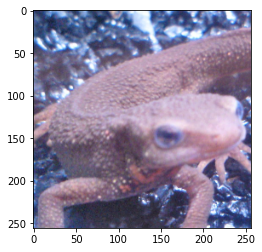

In [3]:
img_orig = io.imread(img_base_url + "dataset/images/imori_256x256.png")
plt.imshow(img_orig)

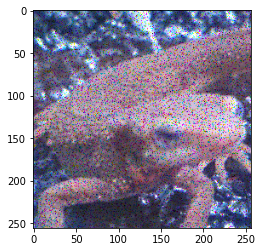

In [4]:
img_noise_orig = io.imread(img_base_url + 'dataset/images/imori_256x256_noise.png')
plt.imshow(img_noise_orig)

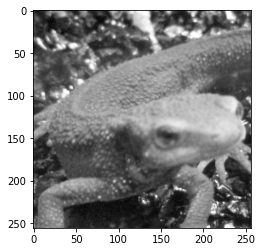

In [5]:
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray')

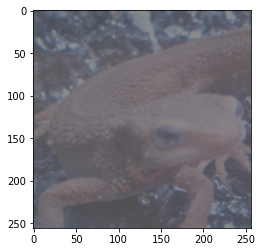

In [5]:
img_dark = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_dark.png')
plt.imshow(img_dark)

## Question 31 アフィン変換（スキュー） Affine transmation (skew)

1. アフィン変換を用いて、X-sharing(dx = 30)画像を作成せよ。
2. アフィン変換を用いて、Y-sharing(dy = 30)画像を作成せよ。
3. アフィン変換を用いて、幾何変換した(dx = 30, dy = 30)画像を作成せよ。

このような画像はスキュー画像と呼ばれ、画像を斜め方向に伸ばした画像である。

出力(1)の場合、x方向にdxだけ引き伸ばした画像はX-shearingと呼ばれる。

出力(2)の場合、y方向にdyだけ引き伸ばした画像はY-shearingと呼ばれる。

それぞれ次式のアフィン変換で実現できる。 ただし、元画像のサイズがh x wとする。

![](https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/questions/question_31_40/images/affine_xysharing.png)

In [6]:
def affine(img, affine_mat, out_shape):
    h, w, ch = img.shape

    [a, b, tx], [c, d, ty] = affine_mat
    out_h, out_w = out_shape

    out = np.zeros([out_h, out_w, ch])

    img_pad = np.pad(img, [(1,1), (1,1), (0,0)])

    xs, ys = np.meshgrid(range(out_w), range(out_h))

    _xs = np.maximum(np.minimum((1 / (a * d - b * c) * (d * xs - b * ys) - tx).astype(int) + 1, w + 1), 0)
    _ys = np.maximum(np.minimum((1 / (a * d - b * c) * (-c * xs + a * ys) - ty).astype(int) + 1, h + 1), 0)

    out[ys, xs] = img_pad[_ys, _xs]
    return np.clip(out, 0, 255).astype(np.uint8)

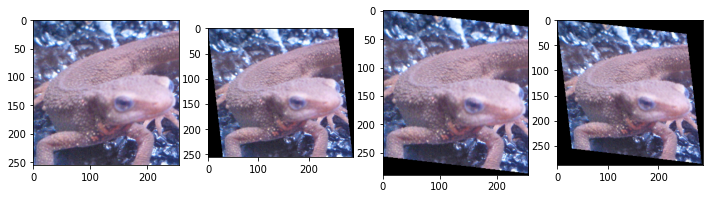

In [32]:
h, w, c = img_orig.shape

plt.figure(figsize=(12, 9))
plt.subplot(1, 4, 1); plt.imshow(img_orig)
plt.subplot(1, 4, 2); plt.imshow(affine(img_orig, [[1, 30 / w, 0], [0, 1, 0]], (h, int(w * 1.13))))
plt.subplot(1, 4, 3); plt.imshow(affine(img_orig, [[1, 0, 0], [30 / h, 1, 0]], (int(h * 1.13), w)))
plt.subplot(1, 4, 4); plt.imshow(affine(img_orig, [[1, 30 / w, 0], [30 / h, 1, 0]], (int(h * 1.13), int(w * 1.13))))
plt.show()

## Question 32 フーリエ変換 Fourier transformation